In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics

In [21]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yerassyl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
products = pd.read_csv('kaspi.csv',sep=';',header=0)

In [23]:
products = products.replace(np.nan, '', regex=True)

In [24]:
products.tail(3)

,Name,Rating,Positive,Negative,Comment
11636,Браслет Xiaomi Mi Band 3 черный,3,"Качество хорошее, непромокаемый",Неудобный,В остальном всё хорошо
11637,Браслет Xiaomi Mi Band 3 черный,3,,"Уведомления мессенджеров не выходят. Ватсап, т...",
11638,Браслет Xiaomi Mi Band 3 черный,2,,"Не понравился то, что невозможно подключить к ...",


In [25]:
for i in range(0,len(products)):
    if type(products.iloc[i]['Positive']) != str:
        products.iloc[i]['Positive'] = str(products.iloc[i]['Positive'])

In [26]:
for i in range(0,len(products)):
    if type(products.iloc[i]['Negative']) != str:
        products.iloc[i]['Negative'] = str(products.iloc[i]['Negative'])

In [27]:
for i in range(0,len(products)):
    if type(products.iloc[i]['Comment']) != str:
        products.iloc[i]['Comment'] = str(products.iloc[i]['Comment'])

In [28]:
def combined_features(row):
    return row['Positive'] + ' '+ row['Negative'] + ' '+ row['Comment']
products['Review'] = products.apply(combined_features, axis=1)

In [29]:
products.head(5)

,Name,Rating,Positive,Negative,Comment,Review
0,Смарт-часы Xiaomi Amazfit Bip Red,5,Цена и качество соответствуют! Отличное качест...,,Все отлично. Всем рекомендую,Цена и качество соответствуют! Отличное качест...
1,Смарт-часы Xiaomi Amazfit Bip Red,4,"Хорошо держится заряд батареи, уже неделю как ...",Не очень удобный ремешок у часов. Ошиблась при...,,"Хорошо держится заряд батареи, уже неделю как ..."
2,Смарт-часы Xiaomi Amazfit Bip Red,5,"Красивый, удобный, информативный, после подклю...","Нельзя управлять музыкой, gps немного врет - к...","В целом всем доволен. На руке стильно сидят, р...","Красивый, удобный, информативный, после подклю..."
3,Смарт-часы Xiaomi Amazfit Bip Red,5,,,Часы реальные. Рекомендую всем.,Часы реальные. Рекомендую всем.
4,Смарт-часы Xiaomi Amazfit Bip Red,5,"Брал в подарок, обладательница часов довольна!",,"Полезный и удобный аксессуар, рекомендую!","Брал в подарок, обладательница часов довольна!..."


In [30]:
kaspi = products.filter(['Name','Rating','Review'], axis=1)

In [31]:
#kaspi.tail(5)
kaspi

,Name,Rating,Review
0,Смарт-часы Xiaomi Amazfit Bip Red,5,Цена и качество соответствуют! Отличное качест...
1,Смарт-часы Xiaomi Amazfit Bip Red,4,"Хорошо держится заряд батареи, уже неделю как ..."
2,Смарт-часы Xiaomi Amazfit Bip Red,5,"Красивый, удобный, информативный, после подклю..."
3,Смарт-часы Xiaomi Amazfit Bip Red,5,Часы реальные. Рекомендую всем.
4,Смарт-часы Xiaomi Amazfit Bip Red,5,"Брал в подарок, обладательница часов довольна!..."
...,...,...,...
11634,Браслет Xiaomi Mi Band 3 черный,2,Капсула хорошо зафиксирована в ремешке Сыроват...
11635,Браслет Xiaomi Mi Band 3 черный,1,Я очень расстроен.
11636,Браслет Xiaomi Mi Band 3 черный,3,"Качество хорошее, непромокаемый Неудобный В ос..."
11637,Браслет Xiaomi Mi Band 3 черный,3,"Уведомления мессенджеров не выходят. Ватсап, ..."


In [32]:
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [51]:
kaspi['Review'] = kaspi['Review'].apply(preprocess_text)

In [33]:
kaspi

,Name,Rating,Review
0,Смарт-часы Xiaomi Amazfit Bip Red,5,Цена и качество соответствуют! Отличное качест...
1,Смарт-часы Xiaomi Amazfit Bip Red,4,"Хорошо держится заряд батареи, уже неделю как ..."
2,Смарт-часы Xiaomi Amazfit Bip Red,5,"Красивый, удобный, информативный, после подклю..."
3,Смарт-часы Xiaomi Amazfit Bip Red,5,Часы реальные. Рекомендую всем.
4,Смарт-часы Xiaomi Amazfit Bip Red,5,"Брал в подарок, обладательница часов довольна!..."
...,...,...,...
11634,Браслет Xiaomi Mi Band 3 черный,2,Капсула хорошо зафиксирована в ремешке Сыроват...
11635,Браслет Xiaomi Mi Band 3 черный,1,Я очень расстроен.
11636,Браслет Xiaomi Mi Band 3 черный,3,"Качество хорошее, непромокаемый Неудобный В ос..."
11637,Браслет Xiaomi Mi Band 3 черный,3,"Уведомления мессенджеров не выходят. Ватсап, ..."


In [34]:
kaspi.Rating = kaspi.Rating.apply(pd.to_numeric)

In [35]:
def sentiment(n):
    return 1 if n >= 4 else 0
kaspi['Sentiment'] = kaspi['Rating'].apply(sentiment)
kaspi

,Name,Rating,Review,Sentiment
0,Смарт-часы Xiaomi Amazfit Bip Red,5,Цена и качество соответствуют! Отличное качест...,1
1,Смарт-часы Xiaomi Amazfit Bip Red,4,"Хорошо держится заряд батареи, уже неделю как ...",1
2,Смарт-часы Xiaomi Amazfit Bip Red,5,"Красивый, удобный, информативный, после подклю...",1
3,Смарт-часы Xiaomi Amazfit Bip Red,5,Часы реальные. Рекомендую всем.,1
4,Смарт-часы Xiaomi Amazfit Bip Red,5,"Брал в подарок, обладательница часов довольна!...",1
...,...,...,...,...
11634,Браслет Xiaomi Mi Band 3 черный,2,Капсула хорошо зафиксирована в ремешке Сыроват...,0
11635,Браслет Xiaomi Mi Band 3 черный,1,Я очень расстроен.,0
11636,Браслет Xiaomi Mi Band 3 черный,3,"Качество хорошее, непромокаемый Неудобный В ос...",0
11637,Браслет Xiaomi Mi Band 3 черный,3,"Уведомления мессенджеров не выходят. Ватсап, ...",0


In [36]:
X = kaspi['Review']
y = kaspi['Sentiment']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Baseline

In [39]:
clf_pipeline = Pipeline(
            [("vectorizer", TfidfVectorizer()), 
            ("classifier", LinearSVC())]
        )

clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', LinearSVC())])

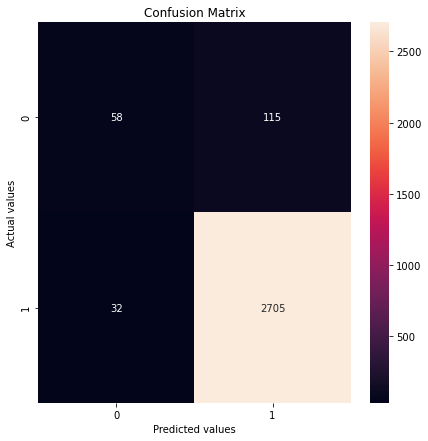

In [40]:
cm = metrics.confusion_matrix(y_test, clf_pipeline.predict(X_test))

def plotConfusionMatrix(cm):
    fig = plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')
    return None

plotConfusionMatrix(cm)

In [41]:
print(metrics.classification_report(y_test, clf_pipeline.predict(X_test)))
f1_base = metrics.f1_score(y_test, clf_pipeline.predict(X_test))

              precision    recall  f1-score   support

           0       0.64      0.34      0.44       173
           1       0.96      0.99      0.97      2737

    accuracy                           0.95      2910
   macro avg       0.80      0.66      0.71      2910
weighted avg       0.94      0.95      0.94      2910



# GridSearchCV

In [42]:
print('\n'.join(clf_pipeline.get_params().keys()))

memory
steps
verbose
vectorizer
classifier
vectorizer__analyzer
vectorizer__binary
vectorizer__decode_error
vectorizer__dtype
vectorizer__encoding
vectorizer__input
vectorizer__lowercase
vectorizer__max_df
vectorizer__max_features
vectorizer__min_df
vectorizer__ngram_range
vectorizer__norm
vectorizer__preprocessor
vectorizer__smooth_idf
vectorizer__stop_words
vectorizer__strip_accents
vectorizer__sublinear_tf
vectorizer__token_pattern
vectorizer__tokenizer
vectorizer__use_idf
vectorizer__vocabulary
classifier__C
classifier__class_weight
classifier__dual
classifier__fit_intercept
classifier__intercept_scaling
classifier__loss
classifier__max_iter
classifier__multi_class
classifier__penalty
classifier__random_state
classifier__tol
classifier__verbose


In [43]:
parameters = {'vectorizer__max_features': (10**3, 10**4),
              'vectorizer__ngram_range': ((1, 2),(2, 3)),
              'classifier__penalty': ('l1','l2'),
              'classifier__C': (range(1,10,2))
             }

In [44]:
gs_clf = GridSearchCV(clf_pipeline, parameters, scoring='f1', cv = 4, n_jobs=-1)
gs_clf.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': range(1, 10, 2),
                         'classifier__penalty': ('l1', 'l2'),
                         'vectorizer__max_features': (1000, 10000),
                         'vectorizer__ngram_range': ((1, 2), (2, 3))},
             scoring='f1')

In [45]:
print(metrics.classification_report(y_test, gs_clf.predict(X_test)))
f1_gsLSVC = metrics.f1_score(y_test, gs_clf.predict(X_test))

              precision    recall  f1-score   support

           0       0.74      0.40      0.52       173
           1       0.96      0.99      0.98      2737

    accuracy                           0.96      2910
   macro avg       0.85      0.70      0.75      2910
weighted avg       0.95      0.96      0.95      2910



# Randomized Search CV on TfidfVectorizer and LogisticRegression

In [46]:
parameters = {'vectorizer__ngram_range': [(1, 2),(1, 3)],
              'vectorizer__min_df': [0.,.2,.4,.6,.8,1],
              'classifier__penalty': ('l1','l2'),
              'classifier__C': (range(1,10,2)),
             }

In [47]:
clf_pipeline_LogitReg = Pipeline(
            [("vectorizer", TfidfVectorizer()),
            ("classifier", LogisticRegression())]
        )

In [48]:
def plotROC(y_test, probs, titl=''):
    if titl!='':
        titl = ' ('+titl+')' 
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic'+titl)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return None

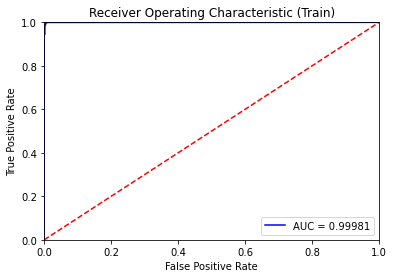

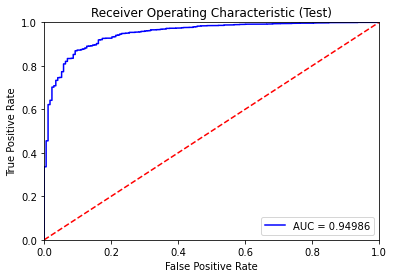

In [49]:
rndgs_clf_LogitReg = RandomizedSearchCV(clf_pipeline_LogitReg, parameters, scoring='f1', cv = 4, n_jobs=-1)
rndgs_clf_LogitReg.fit(X_train, y_train)

probs = rndgs_clf_LogitReg.predict_proba(X_train)[:,1]
plotROC(y_train, probs, 'Train')

probs = rndgs_clf_LogitReg.predict_proba(X_test)[:,1]
plotROC(y_test, probs, 'Test')

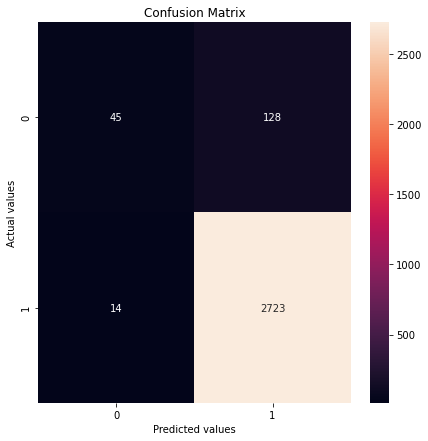

In [50]:
plotConfusionMatrix(metrics.confusion_matrix(y_test, rndgs_clf_LogitReg.predict(X_test)))

In [51]:
print(metrics.classification_report(y_test, rndgs_clf_LogitReg.predict(X_test)))
f1_rndLogR = metrics.f1_score(y_test, rndgs_clf_LogitReg.predict(X_test))

              precision    recall  f1-score   support

           0       0.76      0.26      0.39       173
           1       0.96      0.99      0.97      2737

    accuracy                           0.95      2910
   macro avg       0.86      0.63      0.68      2910
weighted avg       0.94      0.95      0.94      2910



In [54]:
pd.DataFrame([f1_base, f1_gsLSVC, f1_rndLogR],
             index=['BaseLine', 'Grid Serach', 'RandomizedSearchCV'], 
             columns=['F1 score'])

,F1 score
BaseLine,0.973547
GS_LSVC,0.976954
rndGS_LogR,0.974588
